In [24]:
import pandas as pd
import time
import matplotlib.pyplot as plt

df = pd.read_csv('labeled_and_scored_comments.csv')

In [25]:
df.sort_values(['score'])

,id,comment_text,score,toxic,severe_toxic,obscene,threat,insult,identity_hate
1158,61a85266de70cca0,Можешь говорить по русски.,0.000004,0,0,0,0,0,0
5246,030a9ba0b32b4456,Rodzina Krusenstern Potomkowie Admirała Adama ...,0.000009,0,0,0,0,0,0
11040,a6814193ac6b4705,The opening paragraph states that the game is ...,0.000091,0,0,0,0,0,0
24192,f0d6dee96e057a5b,The book is used as a source in a number of ar...,0.000116,0,0,0,0,0,0
2332,cbb9268d3c7429c1,Vals Vienés \n |Rumba \n |Cha Cha Chá(ciclo 7),0.000131,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...
19994,1429a2c930688317,you fucking piece of shit,0.997278,1,1,1,0,1,0
28728,d82e45eb103ad07b,fuck off you stupid aspy asshole,0.997736,1,1,1,0,1,0
25535,e9b92c6c6b01aeef,FUCK YOU YOU PIECE OF SHIT \n FUCK YOU YOU PIE...,0.997982,1,1,1,0,1,0
25945,e783fd267f3a9d3b,FUCK WIKIPEDIA ON WHEELS! \n\nFuck off wikiped...,0.998136,1,1,1,0,1,0


In [26]:
print(df)

                     id                                       comment_text  \
0      0001ea8717f6de06  Thank you for understanding. I think very high...   
1      000247e83dcc1211                   :Dear god this site is horrible.   
2      0002f87b16116a7f  "::: Somebody will invariably try to add Relig...   
3      0003e1cccfd5a40a  " \n\n It says it right there that it IS a typ...   
4      00059ace3e3e9a53  " \n\n == Before adding a new product to the l...   
...                 ...                                                ...   
41333  9480bff99f91a69e  Lesbian Teenager \nHow about the fact she was ...   
41334  9480115b93762c35  Crack, also called cocaine is very good for yo...   
41335  947f206c14a85d9d                  REDIRECT Talk:The Test (The O.C.)   
41336  947e3f5f2d613605  A question concerning your edit to my user-pag...   
41337  94768f82798de227  Cited sources? I looked in Category:Abnormal p...   

          score  toxic  severe_toxic  obscene  threat  insult  

In [35]:
pip install --upgrade google-api-python-client google-auth-httplib2 google-auth-oauthlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.4/10.4 MB 4.4 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 96.6/96.6 kB 1.8 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.6/115.6 kB 2.2 MB/s eta 0:00:0000:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 174.5/174.5 kB 2.5 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 484.2/484.2 kB 3.1 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.7/211.7 kB 2.6 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 155.3/155.3 kB 1.8 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 151.7/151.7 kB 2.4 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.1/77.1 kB 1.9 MB/s eta 0:00:00a 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [37]:
from googleapiclient.discovery import build

import json


def get_toxicity_score(comment):
    
    API_KEY = ''
    
    client = build(
    "commentanalyzer"
    "v1alpha1",
    developerKey=API_KEY,
    discoveryServiceUrl="https://commentanalyzer.googleapis.com/$discovery/rest?version=v1alpha1",
    static_discovery=False,
    version=2.0,
    )
    
    analyze_request = {
    'comment': {'text' : comment }, 
    'requestedAttributes': {'TOXICITY': {}}
    }
    
    response = client.comments().analyze(body=analyze_request).execute()
    toxicity_score = response["attributeScores"]["TOXICITY"]["summaryScore"]["value"]
    
    return toxicity_score


In [38]:
get_toxicity_score('Hey, Thanks for giving me a smile with some of your links. For instance Wikipedia:WikiProject Baiting Maggie')


0.029799197

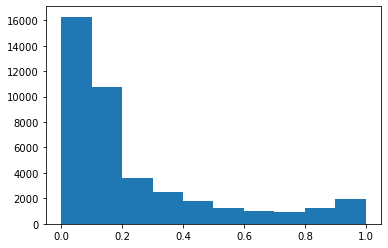

In [39]:
plt.hist(df['score'])
plt.show()

In [40]:
df.loc[df['severe_toxic'] == 1]

,id,comment_text,score,toxic,severe_toxic,obscene,threat,insult,identity_hate
330,1a3ffaa9e319104c,==Yo mama== \n This is yo mama and I know that...,0.959383,1,1,1,0,1,0
332,1a44cad92a0c1c96,==Son of a bitch== \n\n Hey you fucking neo-Na...,0.992705,1,1,1,0,1,1
338,1a4c6302cea3ffe2,Dick Cheney will fucking kill all of those god...,0.951699,1,1,1,1,1,1
430,20cdeb8ee999a478,== You know what smart arrse........phuck a bi...,0.928721,1,1,1,0,1,0
447,2412ef2ce6f87a73,"SSJ, the only way that fucking pitiful excuse ...",0.977829,1,1,1,1,1,0
...,...,...,...,...,...,...,...,...,...
41017,9622c82f97eb26cd,She is a Motherfucker \n\nI will block you Mot...,0.967966,1,1,1,1,1,1
41053,95eda78799f2f83c,i forgot to sign \nReed210 \n\nPS Does your di...,0.975341,1,1,1,0,1,0
41071,95ca65d4cd31d3dd,HOPE YOUR HEAD GETS CUT OFF AND SOMEONE WIPES ...,0.980211,1,1,1,1,1,0
41181,95390a4e0cd90ad3,"Fuck You Asshole \n\nFuck You, you cum-guzzlin...",0.991540,1,1,1,0,1,0


In [41]:
#this shows that there are 379 severely toxic comments

In [42]:
df[df['severe_toxic']==1].sort_values(['score'])


,id,comment_text,score,toxic,severe_toxic,obscene,threat,insult,identity_hate
27263,e0539a647a5ed61d,War CriminalWar CriminalWar CriminalWar Crimin...,0.496129,1,1,0,0,0,0
33118,c0e076f0011acaa6,"""FFFFF UUUUUU CCCCCC KKKKKK ===== YOU! F UU C ...",0.680817,1,1,1,0,1,0
28910,d73516d5de7f7384,big>I HATE Nl33ERS\nI HATE Nl33ERS\nI HATE Nl3...,0.715893,1,1,1,0,1,1
17101,41fe17d86e765e7b,"WIKI NAZI! \n\nThat's all you are, you even re...",0.744944,1,1,0,0,0,0
25371,eab35a94edfe8946,Remeber rahmatul lil alameen? You Sunni monkey...,0.768935,1,1,0,0,1,1
...,...,...,...,...,...,...,...,...,...
6964,e88321c89a619419,Stupid fucking bitch rot in hell piece of shit,0.996872,1,1,1,0,1,0
19994,1429a2c930688317,you fucking piece of shit,0.997278,1,1,1,0,1,0
28728,d82e45eb103ad07b,fuck off you stupid aspy asshole,0.997736,1,1,1,0,1,0
25535,e9b92c6c6b01aeef,FUCK YOU YOU PIECE OF SHIT \n FUCK YOU YOU PIE...,0.997982,1,1,1,0,1,0


In [ ]:
#when I look at the severely toxic scores, I noticed that there were some comments that were severely under scored in terms of how toxic they actually were, and the difference was that they spelled obscene words with numbers for example to reference them, but meaning the actual word.


In [43]:
df[df['obscene']==1].sort_values(['score'])

,id,comment_text,score,toxic,severe_toxic,obscene,threat,insult,identity_hate
25109,ebfbac4939cefc26,Award !\nFor proposing that the Rosetta stone ...,0.240716,0,0,1,0,0,0
20009,13e5e151727db704,"""noobs...\nI have contested the speedy deletio...",0.271009,0,0,1,0,0,0
29490,d403b7f81a7cb054,PIKACHU OPENED UP WIDE AND FILLED WITH SEMEN F...,0.299224,1,0,1,0,0,0
37509,a8e2d931c229a82e,"Oh cool, you deleted other part, what is next?...",0.307727,1,0,1,0,1,0
14443,6e84ad5af3ca4586,get p!$$ed off when someone expresses hate for...,0.321188,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...
19994,1429a2c930688317,you fucking piece of shit,0.997278,1,1,1,0,1,0
28728,d82e45eb103ad07b,fuck off you stupid aspy asshole,0.997736,1,1,1,0,1,0
25535,e9b92c6c6b01aeef,FUCK YOU YOU PIECE OF SHIT \n FUCK YOU YOU PIE...,0.997982,1,1,1,0,1,0
25945,e783fd267f3a9d3b,FUCK WIKIPEDIA ON WHEELS! \n\nFuck off wikiped...,0.998136,1,1,1,0,1,0


In [44]:
df[df['identity_hate']==1].sort_values(['score'])

,id,comment_text,score,toxic,severe_toxic,obscene,threat,insult,identity_hate
31352,ca322730a9b08795,Mmmm... yes... a pint of palestinian blood wou...,0.310894,1,0,0,1,0,1
15076,63c44599fce8f0c2,"Basically, homosexuality lowers productivity, ...",0.444456,0,0,0,0,0,1
11524,9dd29a3d27d96473,Fighting freedom-hating wikiterrorist/admins i...,0.513338,1,0,0,0,1,1
23915,f24a0fcc1f403334,yeah after few days some jews will say nasser ...,0.534903,0,0,0,0,0,1
40496,9903cd41f8b37abb,REDIRECT Talk:Bolivian chinchilla rat,0.534903,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...
25351,eac84ebd5a2b6393,FUCK U DIRTY INDIAN \n\nI HATE INDIANS...YOU G...,0.992921,1,0,1,0,1,1
7304,e297dd3d3e70c9e9,Fuck u bitch \n\nFuck u Bitch,0.993482,1,0,1,0,1,1
16436,4ebb0ac23020ce07,your gay \n\nyou're a fucking faggot,0.994043,1,1,1,0,1,1
21407,ff3c218c3be4d2d4,fucking germanian piece of shit,0.994861,1,1,1,0,1,1


In [51]:
df[df['toxic']==0].sort_values(['score'])

,id,comment_text,score,toxic,severe_toxic,obscene,threat,insult,identity_hate
1158,61a85266de70cca0,Можешь говорить по русски.,0.000004,0,0,0,0,0,0
5246,030a9ba0b32b4456,Rodzina Krusenstern Potomkowie Admirała Adama ...,0.000009,0,0,0,0,0,0
11040,a6814193ac6b4705,The opening paragraph states that the game is ...,0.000091,0,0,0,0,0,0
24192,f0d6dee96e057a5b,The book is used as a source in a number of ar...,0.000116,0,0,0,0,0,0
2332,cbb9268d3c7429c1,Vals Vienés \n |Rumba \n |Cha Cha Chá(ciclo 7),0.000131,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...
4436,59581cdba9297d11,== YOU suck == \n YOU SUCK ~~~~Insert non-form...,0.967137,0,0,0,0,0,0
15372,5eef195f8b3e1c6c,"As I said, you're an asshole and that's all th...",0.968973,0,0,1,0,1,0
3884,e4c69d7040f12681,"""Whatever everyone knowz """"B"""" is his ONE&ONLY...",0.973927,0,0,0,0,0,0
1057,56902f9d41d0696c,fuck y'all all of yall,0.977703,0,0,0,0,0,0


In [56]:
df[df['obscene']==1].sort_values(['score'])

,id,comment_text,score,toxic,severe_toxic,obscene,threat,insult,identity_hate
25109,ebfbac4939cefc26,Award !\nFor proposing that the Rosetta stone ...,0.240716,0,0,1,0,0,0
20009,13e5e151727db704,"""noobs...\nI have contested the speedy deletio...",0.271009,0,0,1,0,0,0
29490,d403b7f81a7cb054,PIKACHU OPENED UP WIDE AND FILLED WITH SEMEN F...,0.299224,1,0,1,0,0,0
37509,a8e2d931c229a82e,"Oh cool, you deleted other part, what is next?...",0.307727,1,0,1,0,1,0
14443,6e84ad5af3ca4586,get p!$$ed off when someone expresses hate for...,0.321188,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...
19994,1429a2c930688317,you fucking piece of shit,0.997278,1,1,1,0,1,0
28728,d82e45eb103ad07b,fuck off you stupid aspy asshole,0.997736,1,1,1,0,1,0
25535,e9b92c6c6b01aeef,FUCK YOU YOU PIECE OF SHIT \n FUCK YOU YOU PIE...,0.997982,1,1,1,0,1,0
25945,e783fd267f3a9d3b,FUCK WIKIPEDIA ON WHEELS! \n\nFuck off wikiped...,0.998136,1,1,1,0,1,0


In [ ]:
#here I notice some comments like id d403b7f81a7cb054 that is more toxic than its score would indicate

In [60]:
get_toxicity_score("FUCK YOU YOU PIECE OF SHIT")


0.9817629

In [62]:
get_toxicity_score("FUCK YOU YOU PIECE OF SHIT ")

0.9749944

In [65]:
get_toxicity_score("F3CKK YOU YOU PI3CE OF $H1T")

0.89241093

In [ ]:
#here I tested spelling the same comment slightly different ways to see how it was effecting the score, weird enough by adding a space in inpput 62 it reduced the toxic score by .8

In [66]:
get_toxicity_score("You are a terrible person I don't want to see you again")

0.6426206

In [ ]:
#manual test

In [79]:
get_toxicity_score("I am a queer white mom")

0.33504707